# Combining Datasets: Concat and Append

In [2]:
import pandas as pd 
import numpy as np

In [3]:
def make_df(cols, ind): 
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [4]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [6]:
# Recall: Concatenation of NumPy Arrays
x = [1,2,3] 
y = [4,5,6] 
z = [7,8,9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
 x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [10]:
# in Pandas:
# pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
#               keys=None, levels=None, names=None, verify_integrity=False,
#               copy=True)

In [11]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [12]:
# and with df:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [19]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display(df3); display(df4); 
pd.concat([df3, df4], axis=1)

,A,B
0,A0,B0
1,A1,B1


,C,D
0,C0,D0
1,C1,D1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [23]:
# difference between np.concatenate and pd.concat: pd concatenation preserves indices
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index
display(x), display(y), display(pd.concat([x, y]));

,A,B
0,A0,B0
1,A1,B1


,A,B
0,A2,B2
1,A3,B3


,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [24]:
# How to handle it:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e: 
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [25]:
# Ignoring the index
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [26]:
# Adding MultiIndex keys
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


# Concatenation with joins

In [30]:
# outer
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/Users/ilya/anaconda/envs/conda/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [29]:
# inner
print(df5); print(df6); print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [32]:
# set specific join_axes
print(df5); print(df6);
print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [33]:
# .append()
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [36]:
df1.append(df5)

/Users/ilya/anaconda/envs/conda/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,A,B,C
1,A1,B1,NaN
2,A2,B2,NaN
1,A1,B1,C1
2,A2,B2,C2


# Combining Datasets: Merge and Join

In [40]:
# One-to-one joins
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1)
display(df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [43]:
# pandas automaticly join 2 df by common column "employee"
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [44]:
# merge in general discards the index, except in the special case of merges by index

In [48]:
# Many-to-one joins
# supervisor value is repeated in rows
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3); display(df4); display(pd.merge(df3, df4))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [49]:
# Many-to-many joins
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
display(df1); display(df5); display(pd.merge(df1, df5))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


# merge tune:

In [53]:
# keyword "on"
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [54]:
# The left_on and right_on keywords
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df3, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [56]:
# merged has "employee" and "name" columns so remove one with drop() method of DataFrames:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [57]:
# The left_index and right_index keywords
df1a = df1.set_index('employee') 
df2a = df2.set_index('employee') 
display(df1a); display(df2a)

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [58]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [59]:
# DataFrames implement the join() method, which performs a merge that 
# defaults to joining on indices:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [61]:
# mix indices and columns, you can combine left_index with right_on or left_on with right_index:
pd.merge(df1a, df3, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [62]:
# Arithmetic for Joins

In [65]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                    columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink']) 

display(df6); display(df7);

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


In [66]:
# inner join
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


In [67]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [68]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [69]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [70]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


### Overlapping Column Names: The suffixes Keyword

In [74]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})
display(df8); display(df9)

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


In [75]:
display(pd.merge(df8, df9, on="name"))
display(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


# Example: US States Data

In [78]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [79]:
display(pop.head()); display(areas.head()); display(abbrevs.head())

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [81]:
merged = pd.merge(pop, abbrevs, left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', axis=1)
merged[:1]

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama


In [82]:
merged.isnull().any()

state/region    False
ages            False
year            False
population      False
state           False
dtype: bool

In [83]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state


In [84]:
final = pd.merge(merged, areas, on='state', how='left')

In [85]:
final[:1]

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423


In [86]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [88]:
final.dropna(inplace=True)

data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423
91,AK,total,2010,713868.0,Alaska,656425
101,AZ,total,2010,6408790.0,Arizona,114006
189,AR,total,2010,2922280.0,Arkansas,53182
197,CA,total,2010,37333601.0,California,163707


In [89]:
data2010['density'] = data2010.population / data2010['area (sq. mi)']
data2010 = data2010.sort_values(by='density', ascending=False)

/Users/ilya/anaconda/envs/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
data2010[:2]

,state/region,ages,year,population,state,area (sq. mi),density
389,DC,total,2010,605125.0,District of Columbia,68,8898.897059
1445,NJ,total,2010,8802707.0,New Jersey,8722,1009.253268


In [92]:
data2010 = data2010.set_index('state')
density = data2010.population / data2010['area (sq. mi)']
density = density.sort_values(ascending=False)

In [94]:
density[:2]

state
District of Columbia    8898.897059
New Jersey              1009.253268
dtype: float64

# Aggregation and Grouping

In [96]:
import seaborn as sns
planets = sns.load_dataset('planets') 
planets.shape

(1035, 6)

In [97]:
planets[:2]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008


In [99]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [100]:
planets.year.mad()

3.0567975915423795

In [1]:
%%html
<img src="imgs/agg.png" width="300px" align="left">

## GroupBy: Split, Apply, Combine

* The split step involves breaking up and grouping a DataFrame depending on the
value of the specified key.
* The apply step involves computing some function, usually an aggregate, transfor‐ mation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array.

In [108]:
# The GroupBy object:
planets.groupby('method')

In [109]:
planets.groupby('method')['orbital_period']

In [110]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [111]:
# Iteration over groups:
for (method, group) in planets.groupby('method'): 
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [116]:
# Dispatch methods:
planets.groupby('method')['year'].describe().unstack()[:10]

       method                       
count  Astrometry                         2.0
       Eclipse Timing Variations          9.0
       Imaging                           38.0
       Microlensing                      23.0
       Orbital Brightness Modulation      3.0
       Pulsar Timing                      5.0
       Pulsation Timing Variations        1.0
       Radial Velocity                  553.0
       Transit                          397.0
       Transit Timing Variations          4.0
dtype: float64

In [137]:
# Aggregate, filter, transform, apply:
# GroupBy objects have aggregate(), filter(), transform(), and apply() methods
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [120]:
# aggregate with list:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [121]:
# or dict:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [122]:
# Filtering
# filter groups with std > 4:
def filter_func(x):
    return x['data2'].std() > 4
display(df.groupby('key').std())

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [123]:
display(df.groupby('key').filter(filter_func))

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


The filter() function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

In [125]:
# Transformation:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [128]:
# apply()
# The apply() method lets you apply an arbitrary function to the group results
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum() 
    return x
display(df)
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


# Так вот, как можно было!!!

In [136]:
def _apply(x):
    x['data3'] = x['data1'] + 1
    x['data4'] = x['data2'] + 2
    return x

df.apply(_apply, axis=1)

,key,data1,data2,data3,data4
0,A,0,5,1,7
1,B,1,0,2,2
2,C,2,3,3,5
3,A,3,3,4,5
4,B,4,7,5,9
5,C,5,9,6,11


# Что это?
# В этом случае значение в L это название группы, к которой мы отноисим строку

то есть groupby, в общем случае, принмает на вход не название колонки, как я думал, а просто флаг, к какой группе отнести каждую сторку в df

In [152]:
# A list, array, series, or index providing the grouping keys
# The key can be any series or list with a length matching that of the DataFrame
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [159]:
df.groupby([0, 0, 0, 0, 0, 0]).sum()

,data1,data2
0,12,24
1,3,3


In [156]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [157]:
# A dictionary or series mapping index to group:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,19
vowel,3,8


In [161]:
# Any Python function. 
# Similar to mapping, you can pass any Python function that will input the 
# index value and output the group:
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [162]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [167]:
# count discovered planets by method and by decade:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables

In [171]:
import numpy as np 
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [172]:
titanic[:3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [173]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [176]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [177]:
# the same but more easy:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Огонь!

In [ ]:
# age = pd.cut(titanic['age'], [0, 18, 30, 80])

In [181]:
# Multilevel pivot tables:
age = pd.cut(titanic['age'], [0, 18, 30, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 80]  0.980000  0.900000  0.304348
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 80]  0.360000  0.106383  0.112500

In [187]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 30]              NaN  0.916667  0.500000          0.958333   
       (30, 80]              NaN  0.846154  0.250000          0.980000   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 30]              NaN  0.040000  0.138889          0.428571   
       (30, 80]              0.0  0.153846  0.102941          0.380282   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 30]  0.888889  0.500000  
       (30, 80]  0.941176  0.333333  
male   (0, 18]   0.818182  0.178571  
       (18, 30]  0.000000  0.214286  
       (30, 80]  0.047619  0.166667

In [192]:
titanic.pivot_table(index='sex', 
                    columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [193]:
# useful to compute totals along each grouping. 
# margins keyword:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [194]:
# The margin label can be specified with the margins_name keyword, 
# which defaults to "All".

# Example: Birthrate Data

In [230]:
url = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"
births = pd.read_csv(url)

In [231]:
births.shape

(15547, 5)

In [232]:
births[:3]

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454


In [233]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [234]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

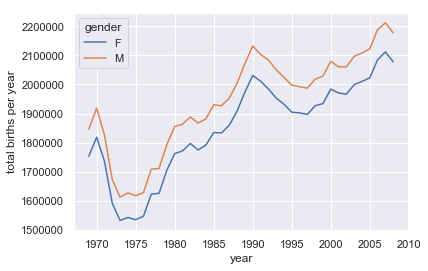

In [235]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot() 
plt.ylabel('total births per year');

In [229]:
births.births.describe()

count    14610.000000
mean      4824.470089
std        579.996983
min       3249.000000
25%       4383.000000
50%       4812.000000
75%       5259.000000
max       6527.000000
Name: births, dtype: float64

In [224]:
# cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) 
# or missing values (e.g., June 99th). 
# One easy way to remove these all at once is to cut outliers; 
# we’ll do this via a robust sigma-clipping operation:

In [236]:
quartiles = np.percentile(births['births'], [25, 50, 75])

In [237]:
quartiles

array([ 4358. ,  4814. ,  5289.5])

You can learn more about sigma-clipping operations in a book I coauthored with Željko Ivezić, Andrew J. Connolly, and Alexander Gray: Statistics, Data Mining, and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of Survey Data (Princeton University Press, 2014).

In [238]:
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
mu, sig

(4814.0, 689.30999999999995)

In [239]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [240]:
births.shape

(14610, 6)

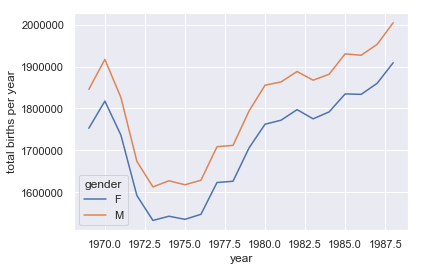

In [241]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot() 
plt.ylabel('total births per year');

In [242]:
 # set 'day' column to integer; it originally was a string due to nulls 
births['day'] = births['day'].astype(int)

In [246]:
# create a datetime index from the year, month, day 
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [247]:
import matplotlib.pyplot as plt 
import matplotlib as mpl

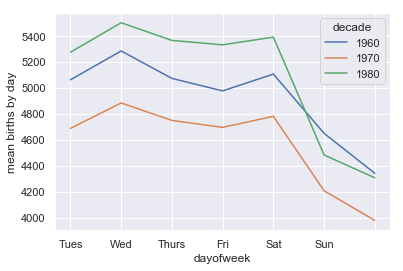

In [248]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [249]:
# births by the day of the year:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

In [251]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

In [252]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


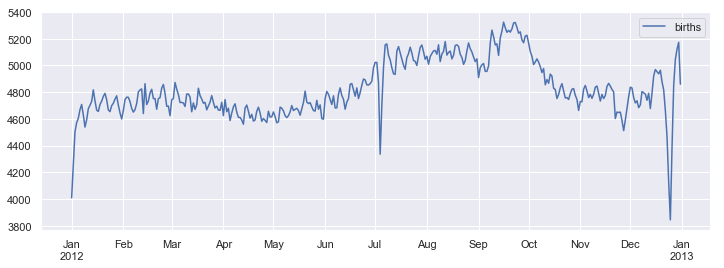

In [253]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4)) 
births_by_date.plot(ax=ax);

# Vectorized String Operations

In [256]:
import pandas as pd
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [258]:
# capitalize all the entries, while skipping over any missing values:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [259]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                    'Eric Idle', 'Terry Jones', 'Michael Palin'])

len() lower() ljust() upper() rjust() find() center() 
rfind() zfill() index() strip() rindex() rstrip() capitalize() 
lstrip() swapcase()
translate()
startswith()
endswith()
isalnum()
isalpha()
isdigit()
isspace()
istitle()
islower()
isupper()
isnumeric()
isdecimal()
split()
rsplit()
partition()
rpartition()

In [261]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [262]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [271]:
monte.str.ljust(100).str.len()

0    100
1    100
2    100
3    100
4    100
5    100
dtype: int64

In [272]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [277]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

## Methods using regular expressions

In [2]:
%%html
<img src="imgs/re.png" width="500px" align="left">

In [281]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [282]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

## Miscellaneous methods

In [3]:
%%html
<img src="imgs/str_ops.png" width="500px" align="left">

In [288]:
# df.str.get(i) == df.str[i]
# df.str.slice(0, 3) is equivalent to df.str[0:3]
monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [289]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

# Indicator variables

In [291]:
# get_dummies() method
full_monte = pd.DataFrame({'name': monte, 
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C','B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [338]:
full_monte['_state'] = 0

In [340]:
full_monte

,info,name,_state
0,B|C|D,Graham Chapman,0
1,B|D,John Cleese,0
2,A|C,Terry Gilliam,0
3,B|D,Eric Idle,0
4,B|C,Terry Jones,0
5,B|C|D,Michael Palin,0


In [293]:
# get_dummies() lets split out these indicator variables into a DataFrame:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Example: Recipe Database

In [316]:
# !curl -O https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz

In [317]:
# !gunzip 20170107-061401-recipeitems.json.gz

In [314]:
import json
with open('data/20170107-061401-recipeitems.json') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list 
    data_json = "[{0}]".format(','.join(data))
    # read the result as a JSON
    recipes = pd.read_json(data_json)

In [315]:
recipes.shape

(173278, 17)

In [324]:
recipes.loc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

In [325]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [332]:
# longest ingridients list:
recipes.name[recipes.ingredients.str.len().values.argmax()]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [333]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [334]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [341]:
# A simple recipe recommender
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [343]:
import re

In [344]:
spice_df = pd.DataFrame(
    dict(
        (spice, recipes.ingredients.str.contains(spice, re.IGNORECASE)) 
        for spice in spice_list
    )
)

In [346]:
spice_df[:2]

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False


In [347]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

In [348]:
# use the index returned by this selection to discover 
# the names of the recipes that have this combination:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

# Time Series

Date and time data comes in a few flavors, which we will discuss here:
* Time stamps reference particular moments in time (e.g., July 4th, 2015, at 7:00 a.m.).
* Time intervals and periods reference a length of time between a particular begin‐ ning and end point—for example, the year 2015. Periods usually reference a spe‐ cial case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods constituting days).
* Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

In [353]:
from dateutil import parser
date = parser.parse("4th of July, 2015") 
date

datetime.datetime(2015, 7, 4, 0, 0)

In [354]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
date.strftime('%A')

'Saturday'

In [359]:
# datetime64
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [362]:
display(np.arange(12))
date + np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

In [364]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [365]:
np.datetime64('2015-07-04 12:59:59.50')

numpy.datetime64('2015-07-04T12:59:59.500')

In [367]:
# sizes here:
# http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

In [368]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015") 
date

Timestamp('2015-07-04 00:00:00')

In [369]:
date.strftime('%A')

'Saturday'

In [372]:
# pd.to_timedelta!
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [376]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [377]:
# becouse index is a date:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

# Круто!

In [383]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

In [391]:
# Timestamp
# Period
# Timedelta

In [387]:
import datetime

In [390]:
dates = pd.to_datetime([datetime.datetime(2015, 7, 3), '4th of July, 2015',
                                   '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [394]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [395]:
dates.to_period('M')

PeriodIndex(['2015-07', '2015-07', '2015-07', '2015-07', '2015-07'], dtype='period[M]', freq='M')

In [397]:
# TimedeltaIndex is created, when one date is subtracted from another:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [398]:
# Creating:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [399]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [400]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [401]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [4]:
%%html
<img src="imgs/date1.png" width="300px" align="left">
<img src="imgs/date2.png" width="200px" align="left">

# Тоже круто!

In [404]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [408]:
from pandas.tseries.offsets import BDay 
pd.date_range('2018-10-01', periods=10, freq=BDay())

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-08', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12'],
              dtype='datetime64[ns]', freq='B')

# Resampling, Shifting, and Windowing

In [410]:
# for work with stock data:
# conda install pandas-datareader

In [8]:
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

# pd.core.common.is_list_like = pd.api.types.is_list_like

# from pandas_datareader import data
# goog = data.DataReader('GOOG', start='2004', end='2016', data_source='google')
# goog.head()

In [84]:
goog = pd.read_csv('data/google.csv')

In [85]:
goog['Date'] = pd.to_datetime(goog.Date)
goog = goog.set_index('Date')

In [86]:
goog.index.min()

Timestamp('2009-05-22 00:00:00')

In [87]:
# goog = goog['Close'][-4000:]
goog = goog['Close']

In [40]:
goog[:2]

Date
2014-09-11    591.109985
2014-09-12    584.900024
Name: Close, dtype: float64

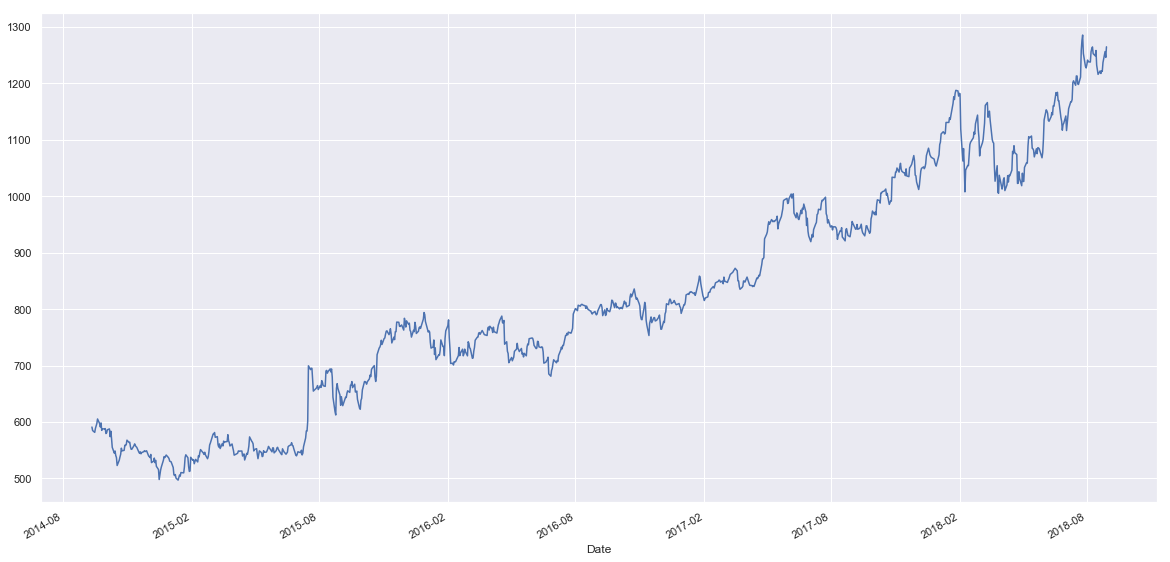

In [41]:
plt.rcParams['figure.figsize'] = (20, 10)
goog.plot()

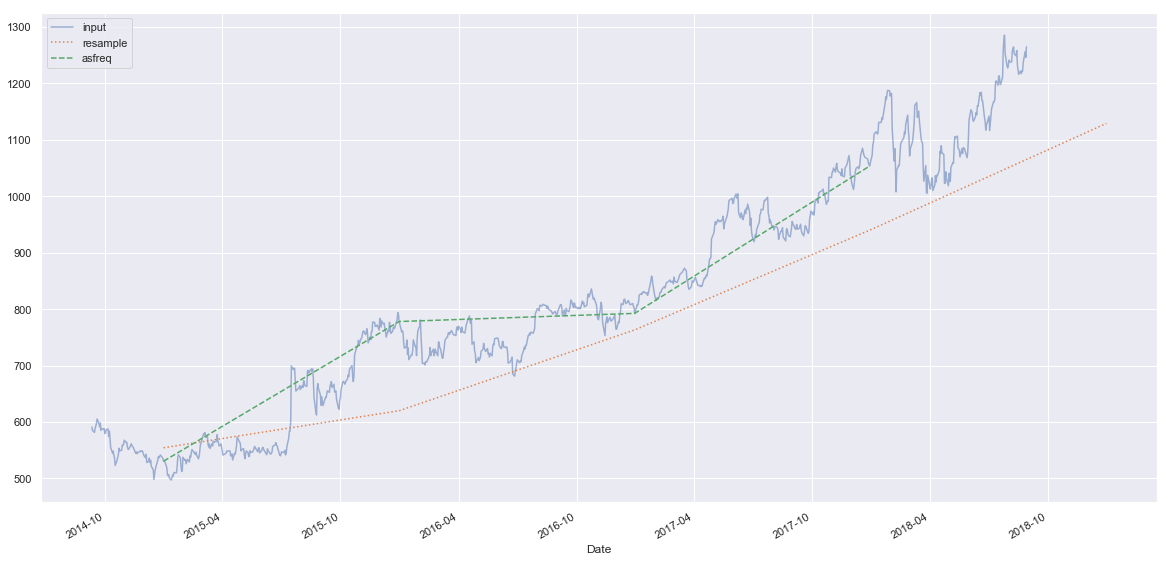

In [42]:
# Resampling:
# alpha=0.5 - прозрачность
goog.plot(alpha=0.5, style='-')

# resample (aggregate) at the end of business year
goog.resample('BA').mean().plot(style=':')

# select data at the end of business year
goog.asfreq('BA').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

In [43]:
goog.resample('BA').mean()

Date
2014-12-31     554.393848
2015-12-31     619.988213
2016-12-30     763.213214
2017-12-29     939.773070
2018-12-31    1128.975809
Freq: BA-DEC, Name: Close, dtype: float64

In [44]:
goog.asfreq('BA')

Date
2014-12-31     530.659973
2015-12-31     778.010010
2016-12-30     792.450012
2017-12-29    1053.400024
Freq: BA-DEC, Name: Close, dtype: float64

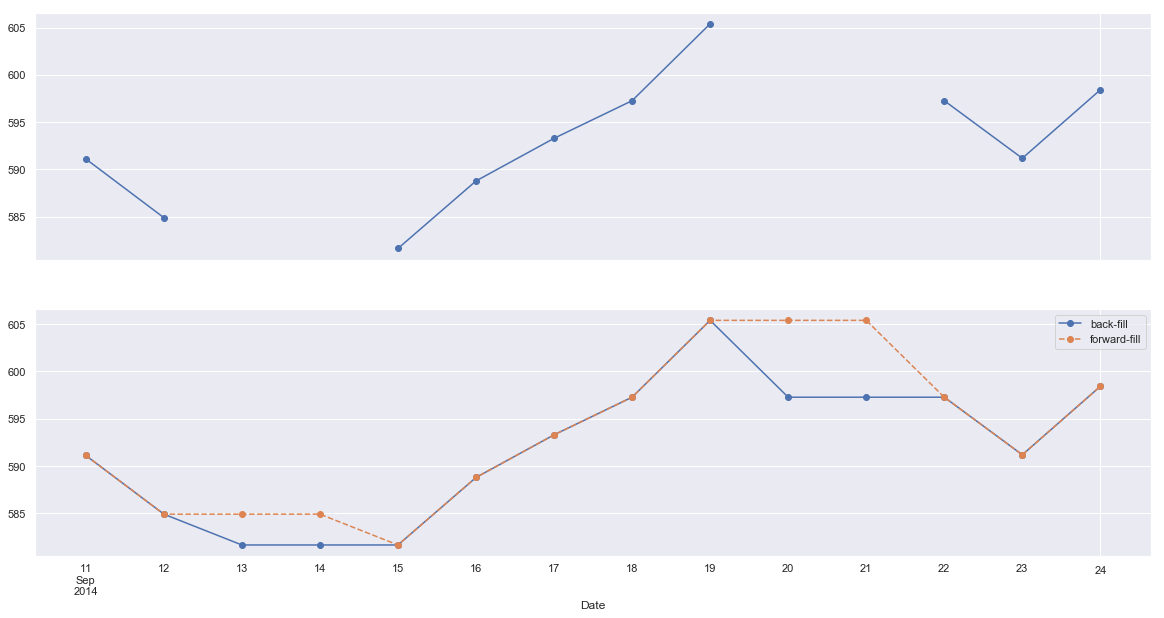

In [46]:
# Если коротко - asfreq просто выбирает данные с определенной частотой. 
# В данном случае за каждый день
# И дыры в данных могут заполняться предыдущим или следующим значением:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

## Time-shifts 

In [69]:
goog[:10]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
2009-06-01,209.574570,215.015015,209.474472,213.493500,213.493500,6638100
2009-06-02,213.338333,215.195190,211.911911,214.414413,214.414413,5241900
2009-06-03,213.213211,216.446442,212.212219,216.041046,216.041046,7058500
2009-06-04,217.867874,220.840836,217.467468,220.360367,220.360367,7268900


In [70]:
goog = goog.asfreq('D', method='pad')

In [72]:
# мы заполнили недостающие даты предыдущим значением
goog[:10]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-23,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-24,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-25,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
2009-05-30,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [77]:
# сдвинули значения на 900 дней вперед
goog.shift(900)[899:903]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-07,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-08,198.528534,199.524521,196.196198,196.946945,196.946945,3433700.0
2011-11-09,198.528534,199.524521,196.196198,196.946945,196.946945,3433700.0
2011-11-10,198.528534,199.524521,196.196198,196.946945,196.946945,3433700.0


In [81]:
# сдвинули индекс (дату) на 900 дней вперед
goog.tshift(900)[:3]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-08,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2011-11-09,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2011-11-10,198.528534,199.524521,196.196198,196.946945,196.946945,3433700


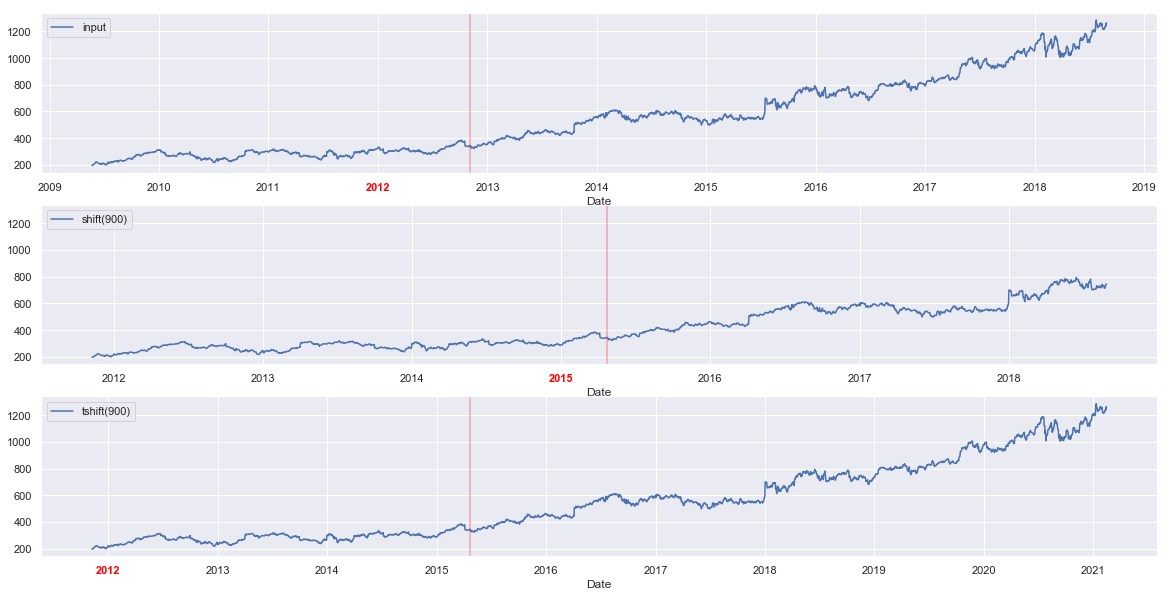

In [88]:
# shift() shifts the data
# tshift() shifts the index
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2012-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
# подписи к оси X
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
# вертикальная линия
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

# Зачем это может понадобится?

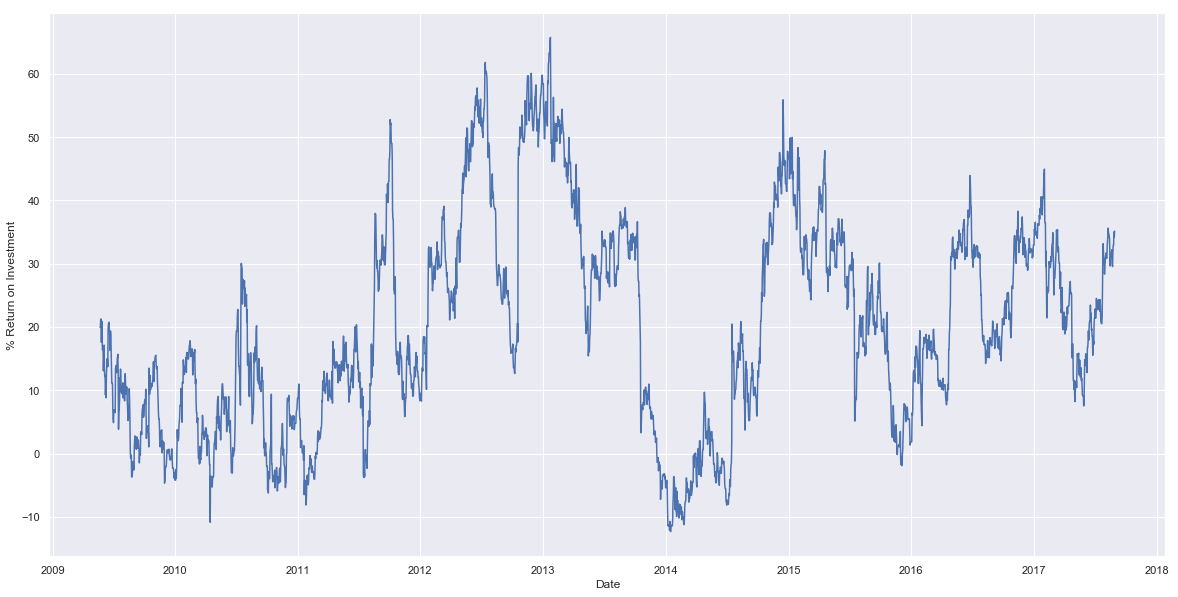

In [96]:
# считаем возврат инвестиций через год.
# но это можно было бы сдеать более очевидным способом
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

## Rolling windows

In [101]:
rolling = goog.rolling(365, center=True)

In [102]:
rolling

Rolling [window=365,center=True,axis=0]

In [103]:
data = pd.DataFrame({'input': goog, 
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()
                    })

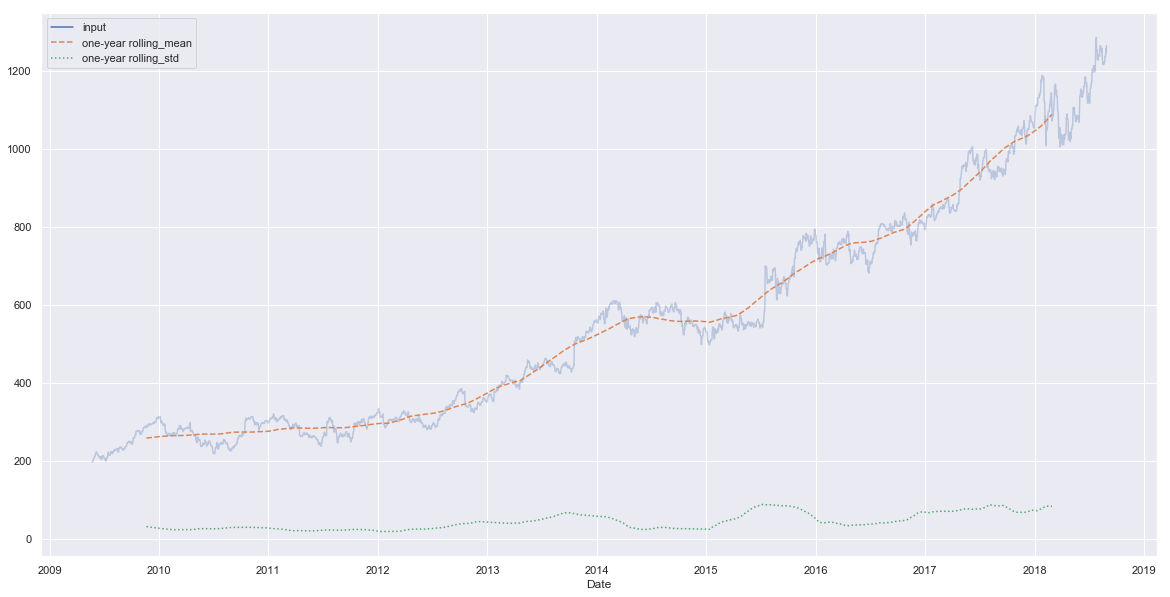

In [105]:
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [115]:
# As with groupby operations, the aggregate() and apply() methods can be used 
# for custom rolling computations.

In [116]:
# http://shop.oreilly.com/product/0636920023784.do
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html

# Example: Visualizing Seattle Bicycle Counts

In [121]:
data = pd.read_csv('data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',
                  index_col='Date', parse_dates=True
                  )

In [123]:
data[:2]

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0


In [126]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [127]:
data[:2]

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0


In [128]:
data.dropna().describe()

,West,East,Total
count,52527.000000,52527.000000,52527.000000
mean,57.563101,54.091343,111.654444
std,83.086986,70.726110,140.493300
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,61.000000
75%,70.000000,72.000000,146.000000
max,717.000000,698.000000,957.000000


In [167]:
import numpy as np
import seaborn; seaborn.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)

In [136]:
data.shape

(52536, 3)

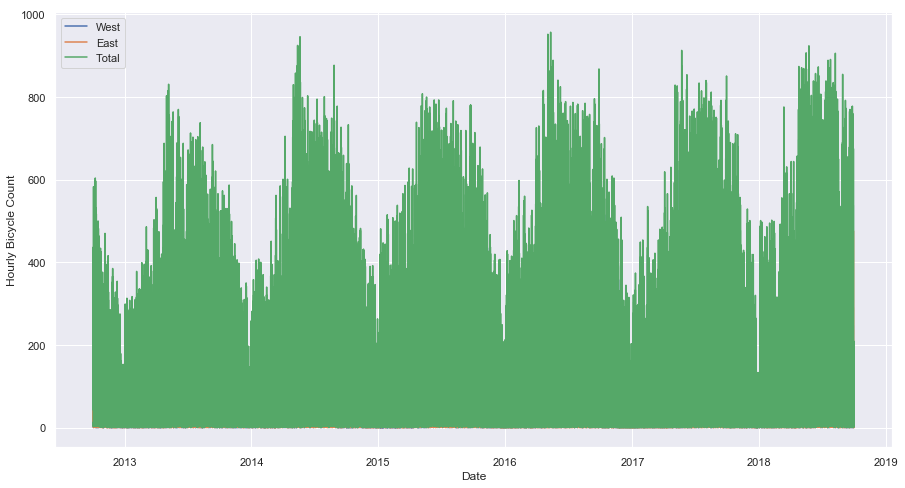

In [137]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

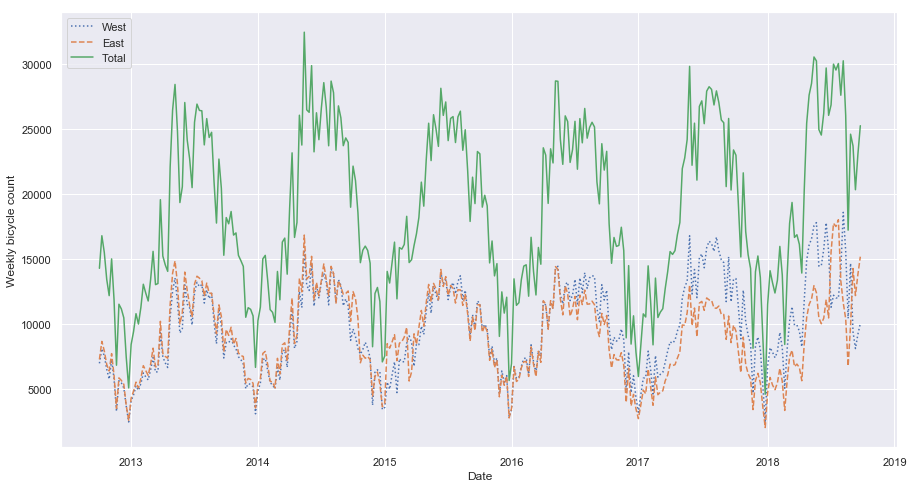

In [138]:
# 52536 часов сложно отразить на графике.
# сделаем resample
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

In [139]:
# очевидный сезонный тренд. Но внутри сезона так же есть сильная дисперсия, вероятно зависит от погоды

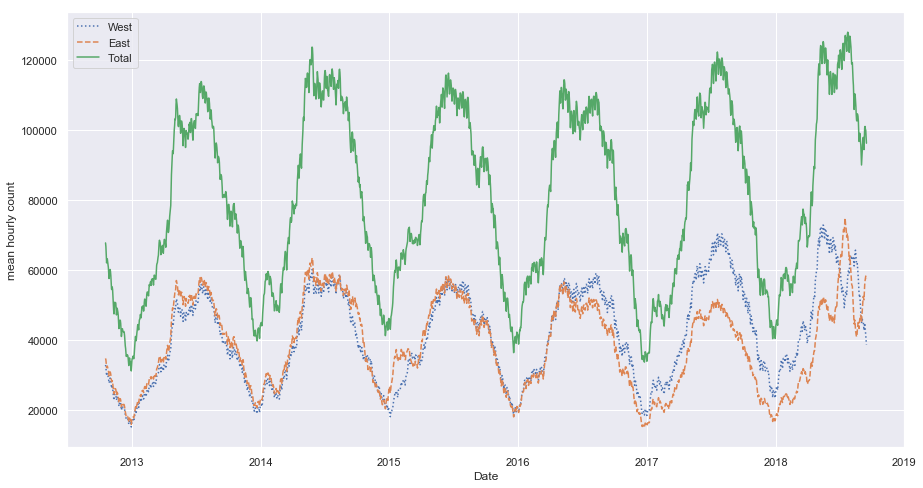

In [141]:
# pd.rolling_mean()
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

In [143]:
# Неровность результата обусловлена жестким отключением окна. 
# Мы можем получить более плавную версию скользящего среднего с помощью оконной функции, например, 
# гауссовского окна. 
# ширину окна 50 дней, ширину гауссова в окне: 10 дней

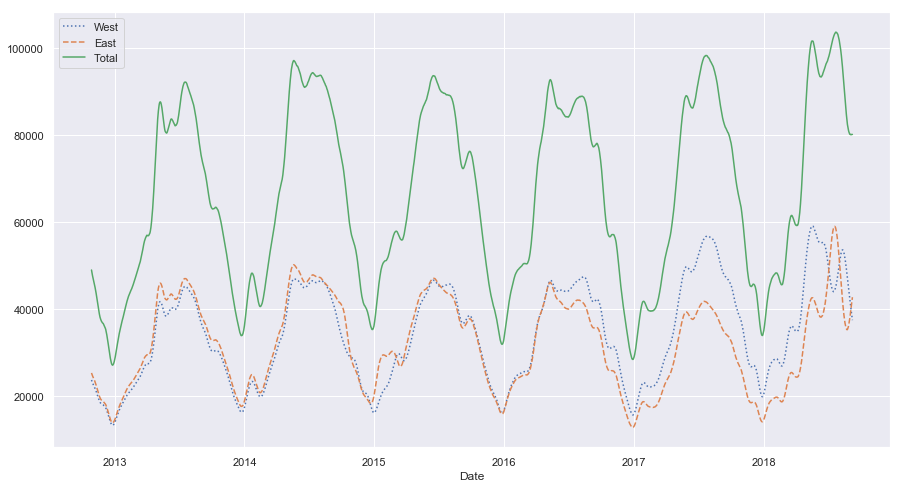

In [142]:
daily.rolling(
    50, center=True, win_type='gaussian'
).sum(std=10).plot(style=[':', '--', '-']);

In [163]:
import re
windows = re.findall('``([a-z]*)``',
"""* ``triang``
* ``blackman``
* ``hamming``
* ``bartlett``
* ``parzen``
* ``bohman``
* ``blackmanharris``
* ``nuttall``
* ``barthann``

* ``gaussian`` (needs std)
* ``general_gaussian`` (needs power, width)""")

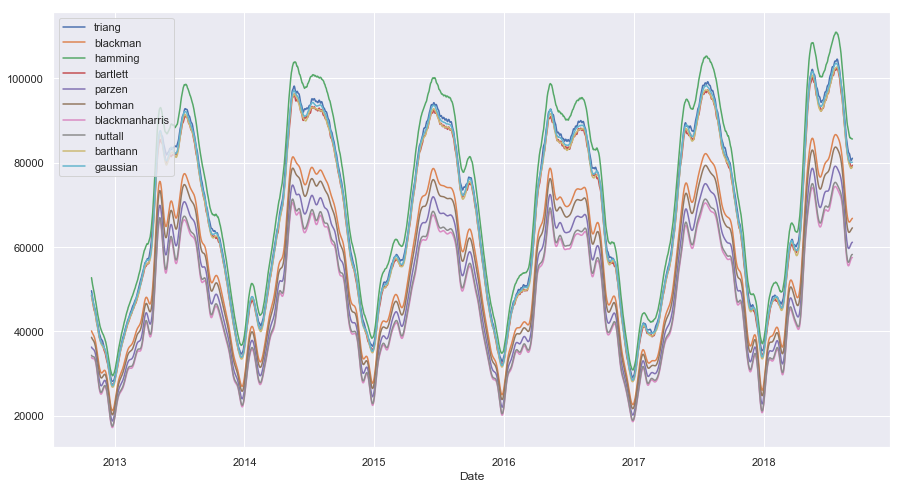

In [164]:
# * ``boxcar``
# * ``triang``
# * ``blackman``
# * ``hamming``
# * ``bartlett``
# * ``parzen``
# * ``bohman``
# * ``blackmanharris``
# * ``nuttall``
# * ``barthann``
# * ``kaiser`` (needs beta)
# * ``gaussian`` (needs std)
# * ``general_gaussian`` (needs power, width)
# * ``slepian`` (needs width).
for window in windows:
    daily.Total.rolling(50, center=True, win_type=window
        ).sum(std=10).plot(style=['-'])
plt.legend(windows)

### Digging into the data

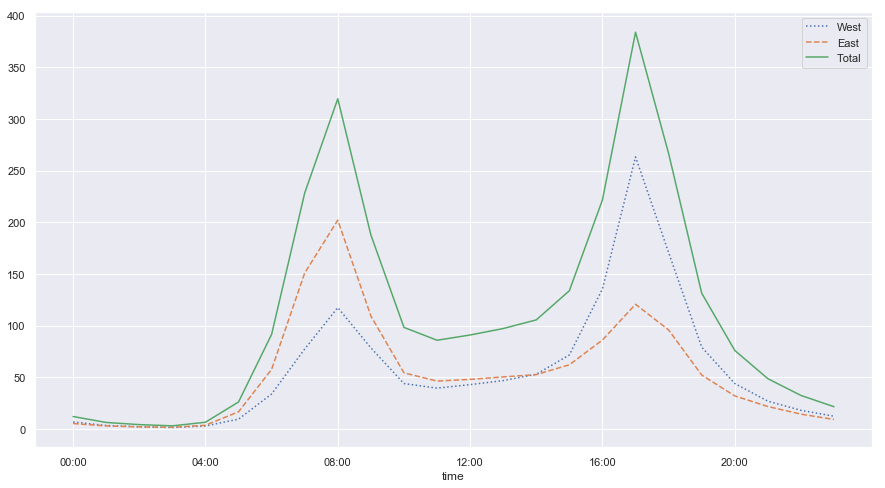

In [168]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [169]:
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

In [170]:
by_time

,West,East,Total
00:00:00,6.784376,5.287346,12.071722
01:00:00,3.408862,2.922339,6.331201
02:00:00,2.141026,2.089286,4.230311
03:00:00,1.413888,1.632252,3.046140
04:00:00,2.918228,3.616720,6.534947
05:00:00,9.520329,16.621745,26.142074
06:00:00,33.871174,57.661946,91.533120
07:00:00,77.381910,150.925080,228.306989
08:00:00,117.427593,202.083143,319.510735
09:00:00,78.488574,109.324497,187.813071


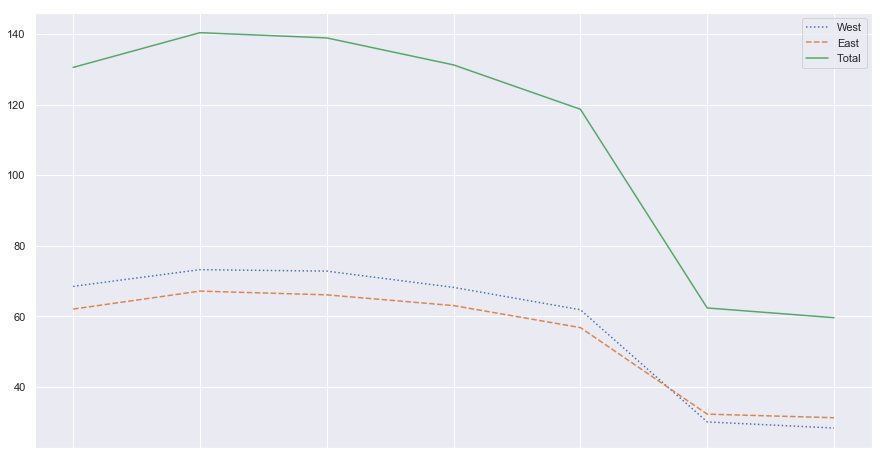

In [178]:
by_weekday = data.groupby(data.index.dayofweek).mean()
wd = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = wd
by_weekday.plot(style=[':', '--', '-'])

In [172]:
by_weekday

,West,East,Total
Mon,68.482639,62.051816,130.534455
Tues,73.226022,67.147475,140.373497
Wed,72.808040,66.084931,138.892971
Thurs,68.201145,63.041800,131.242945
Fri,61.867776,56.809720,118.677497
Sat,30.079207,32.289404,62.368610
Sun,28.347676,31.270414,59.618090


In [179]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

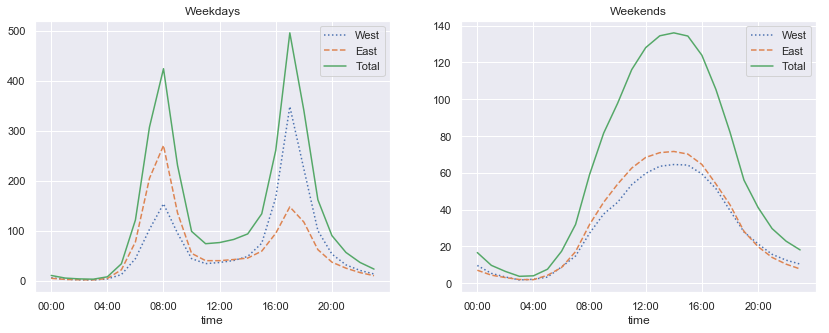

In [183]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5)) 
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                                       xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                                       xticks=hourly_ticks, style=[':', '--', '-']);

# High-Performance Pandas: eval() and query()

In [185]:
# eval() and query(): access C-speed operations without costly allocation of inter‐ mediate arrays. 

In [186]:
# every intermediate step is explicitly allocated in memory!

In [189]:
import numpy as np
rng = np.random.RandomState(42) 

x = rng.rand(int(1E6))
y = rng.rand(int(1E6))

In [194]:
mask = (x > 0.5) & (y < 0.5)
## the same as:
# tmp1 = (x > 0.5) 
# tmp2 = (y<0.5)
# mask = tmp1 & tmp2

In [196]:
!which conda

/Users/ilya/anaconda/envs/conda/bin/conda


In [195]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)') 
np.allclose(mask, mask_numexpr)

ImportError: No module named 'numexpr'

## pandas.eval() for Efficient Operations

In [201]:
import pandas as pd 
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

In [202]:
df1.shape, df2.shape, df3.shape, df4.shape

((100000, 100), (100000, 100), (100000, 100), (100000, 100))

In [205]:
%timeit -n 10 df1 + df2 + df3 + df4

90 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [206]:
%timeit -n 10 pd.eval('df1 + df2 + df3 + df4')

88.8 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [207]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

In [208]:
# В книге eval() быстрее в два раза. А тут на 2 ms. Почему?

### Operations supported by pd.eval()


In [209]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))

In [216]:
# Arithmetic

In [225]:
%timeit -n 10 result1 = -df1 * df2 / (df3 + df4) - df5
%timeit -n 10 result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')

962 µs ± 148 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.73 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [215]:
# А тут eval() вообще дольше!

In [224]:
# Comparison
%timeit -n 10 result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
%timeit -n 10 result2 = pd.eval('df1 < df2 <= df3 != df4')

5.02 ms ± 283 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.87 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [223]:
# Bitwise
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')

In [227]:
# Object attributes and indices
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')

Other operations, such as function calls, conditional statements, loops, and other more involved constructs, are currently not implemented in pd.eval(). If you’d like to execute these more complicated types of expressions, you can use the Numexpr library itself.

## DataFrame.eval() for Column-Wise Operations

In [230]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
%timeit -n 10 result1 = (df['A'] + df['B']) / (df['C'] - 1)
%timeit -n 10 result2 = pd.eval("(df.A + df.B) / (df.C - 1)")

303 µs ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.19 ms ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [231]:
# or
%timeit -n 10 result3 = df.eval('(A + B) / (C - 1)')

1.33 ms ± 96.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [232]:
# Assignment!!!
df.eval('D = (A + B) / C', inplace=True)

In [233]:
df[:2]

,A,B,C,D
0,0.818708,0.993065,0.998051,1.815310
1,0.007756,0.371926,0.229226,1.656368


In [234]:
# and modified:
df.eval('D = (A - B) / C', inplace=True)
df[:2]

,A,B,C,D
0,0.818708,0.993065,0.998051,-0.174697
1,0.007756,0.371926,0.229226,-1.588697


In [236]:
# Local variables in DataFrame.eval()
# @ marks a variable name rather than a column name
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')

## DataFrame.query() Method

In [238]:
%timeit -n 10 result1 = df[(df.A < 0.5) & (df.B < 0.5)]
%timeit -n 10 result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
%timeit -n 10 result3 = df.query('A < 0.5 and B < 0.5')

991 µs ± 202 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
24 ms ± 923 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.71 ms ± 70.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [239]:
Cmean = df['C'].mean()
%timeit -n 10 result1 = df[(df.A < Cmean) & (df.B < Cmean)]
%timeit -n 10 result2 = df.query('A < @Cmean and B < @Cmean')

972 µs ± 137 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.74 ms ± 89.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# В общем это в превую очередь про память, а не про скорость.